<a href="https://colab.research.google.com/github/ddarshana04/Geospatial-Deep-Learning-for-Estimating-Socioeconomic-Well-being-in-Developing-Regions/blob/main/6)Satellite_Image_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into Colaboratory:
import os
import os.path
import numpy as np
import time
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import PIL.Image
import glob
import shutil
import pickle

In [ ]:
## tf/keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
#from keras.constraints import maxnorm
from keras import optimizers
import keras.backend as K
from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.applications.vgg16 import VGG16

In [ ]:
from keras.models import Sequential, Model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, AveragePooling2D, Activation, Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from multiprocessing import Pool

In [ ]:
!pip install https://github.com/fastai/fastai1/archive/master.zip

  Using cached https://github.com/fastai/fastai1/archive/master.zip
  Preparing metadata (setup.py) ... done
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/results.py", line 184, in __init__
    self[name] = toklist[0]
TypeError: 'int' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(

In [ ]:
from fastai.vision import *
from fastai.widgets import *

In [ ]:
print('TensorFlow version')
print(tf.__version__)
%matplotlib inline
np.random.seed(42)

TensorFlow version
2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
path = Path('/content/drive/MyDrive/')

# ***Get the train/test images***

In [ ]:
path_1t = path / 'google_image_cnn/train/class_1/'
path_2t = path / 'google_image_cnn/train/class_2/'
path_3t = path / 'google_image_cnn/train/class_3/'
path_1s = path / 'google_image_cnn/test/class_1/'
path_2s = path / 'google_image_cnn/test/class_2/'
path_3s = path / 'google_image_cnn/test/class_3/'

In [ ]:
# train set
path_train = [] # the path for all training examples
label_train = [] # the label for all training examples

class_1_files = os.listdir(path_1t)
label_train += [[1, 0, 0]] * len(class_1_files)
path_train += [str(path_1t / i) for i in class_1_files]  # Use str() to convert PosixPath to string

class_2_files = os.listdir(path_2t)
label_train += [[0, 1, 0]] * len(class_2_files)
path_train += [str(path_2t / i) for i in class_2_files]

class_3_files = os.listdir(path_3t)
label_train += [[0, 0, 1]] * len(class_3_files)
path_train += [str(path_3t / i) for i in class_3_files]


In [ ]:
# test set
path_test = []
label_test = []

class_1_files = os.listdir(path_1s)
label_test += [[1, 0, 0]] * len(class_1_files)
path_test += [str(path_1s / i) for i in class_1_files]  # Use str() or / operator to concatenate

class_2_files = os.listdir(path_2s)
label_test += [[0, 1, 0]] * len(class_2_files)
path_test += [str(path_2s / i) for i in class_2_files]

class_3_files = os.listdir(path_3s)
label_test += [[0, 0, 1]] * len(class_3_files)
path_test += [str(path_3s / i) for i in class_3_files]


In [ ]:
# Print the lengths of the path_train and path_test lists
print('Number of images in train directory:', len(path_train))
print('Number of images in test directory:', len(path_test))

In [ ]:
#IMG_DIM = (400, 400) # image size
IMG_DIM = (256,256) # reduce image size

t1=time.time()
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in path_train]
train_imgs = np.array(train_imgs)
train_labels = np.array(label_train)#

test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in path_test]
test_imgs = np.array(test_imgs)
test_labels = np.array(label_test)#
t2=time.time()

print(t2-t1)
print('Train dataset shape:', train_imgs.shape)
print('Test dataset shape:', test_imgs.shape)

107.55464315414429
Train dataset shape: (565, 256, 256, 3)
Test dataset shape: (143, 256, 256, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255  # scale image pixel to 255
test_imgs_scaled /= 255 # scale image pixel to 255

low nightlight intensity
[1 0 0]
(256, 256, 3)


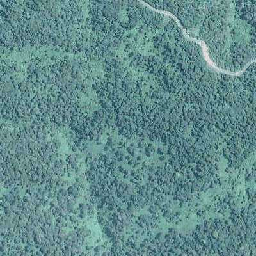

In [ ]:
print('low nightlight intensity')
print(train_labels[30])
print(train_imgs[30].shape)
array_to_img(train_imgs[30])

low nightlight intensity
[1 0 0]
(256, 256, 3)


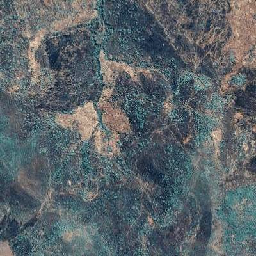

In [ ]:
print('low nightlight intensity')
print(train_labels[50])
print(train_imgs[50].shape)
array_to_img(train_imgs[50])

low nightlight intensity
[1 0 0]
(256, 256, 3)


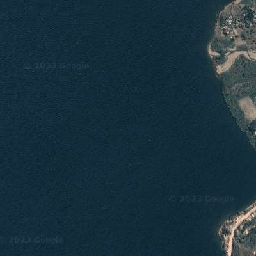

In [ ]:
print('low nightlight intensity')
print(train_labels[120])
print(train_imgs[120].shape)
array_to_img(train_imgs[120])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


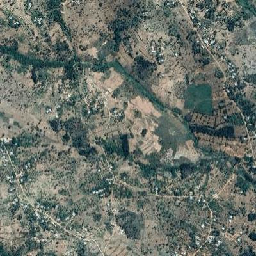

In [ ]:
print('medium nightlight intensity')
print(train_labels[360])
print(train_imgs[360].shape)
array_to_img(train_imgs[360])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


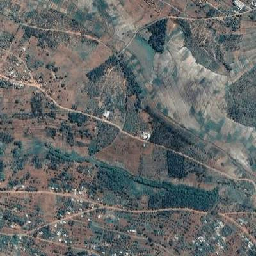

In [ ]:
print('medium nightlight intensity')
print(train_labels[260])
print(train_imgs[260].shape)
array_to_img(train_imgs[260])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


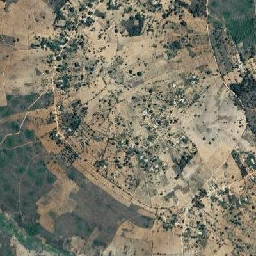

In [ ]:
print('medium nightlight intensity')
print(train_labels[290])
print(train_imgs[290].shape)
array_to_img(train_imgs[290])

high nightlight intensity
[0 0 1]
(256, 256, 3)


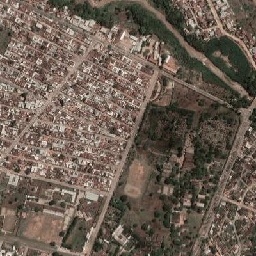

In [ ]:
print('high nightlight intensity')
print(train_labels[-20])
print(train_imgs[-20].shape)
array_to_img(train_imgs[-20])

high nightlight intensity
[0 0 1]
(256, 256, 3)


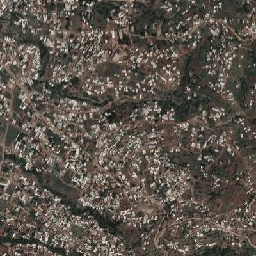

In [ ]:
print('high nightlight intensity')
print(train_labels[-75])
print(train_imgs[-75].shape)
array_to_img(train_imgs[-75])

high nightlight intensity
[0 0 1]
(256, 256, 3)


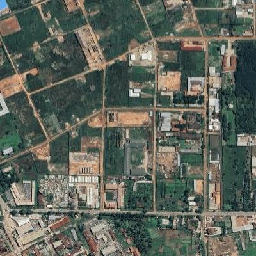

In [ ]:
print('high nightlight intensity')
print(train_labels[-110])
print(train_imgs[-110].shape)
array_to_img(train_imgs[-110])

Model:
# ***1. CNN model (similar to LeNet-5)***

In [ ]:
batch_size = 30
epochs = 200
input_shape = (256,256, 3)
np.random.seed(42)

In [ ]:
# simple CNN models (LeNet-5)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()
# first layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))

# 2nd layer, with pooling and dropout
model.add(Conv2D(64, kernel_size=(3, 3),kernel_regularizer = 'l2', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
# dense hidden layer, with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),#'adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense (Dense)               (None, 128)               130056320 
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))


# Define the file path where the model will be saved
model_file_path = '/content/drive/MyDrive/CNN_model/model_epoch_{epoch}.h5'

# Define the frequency of saving the model (every 10 epochs in this case)
save_frequency = 10

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

cnn_model = model
# Train the model with the callback
history = cnn_model.fit(x=train_imgs_scaled, y=train_labels,
                        validation_data=(test_imgs_scaled, test_labels),
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        callbacks=[save_model_callback])

Epoch 1/200
 6/19 [========>.....................] - ETA: 2s - loss: 37.8605 - accuracy: 0.3444

19/19 [==============================] - 20s 545ms/step - loss: 13.0224 - accuracy: 0.3487 - val_loss: 1.3961 - val_accuracy: 0.3217
Epoch 2/200
19/19 [==============================] - 4s 207ms/step - loss: 1.5611 - accuracy: 0.3487 - val_loss: 1.3638 - val_accuracy: 0.3357
Epoch 3/200
19/19 [==============================] - 4s 204ms/step - loss: 1.5503 - accuracy: 0.3823 - val_loss: 1.4795 - val_accuracy: 0.3357
Epoch 4/200
19/19 [==============================] - 4s 199ms/step - loss: 1.2581 - accuracy: 0.3841 - val_loss: 1.6287 - val_accuracy: 0.2867
Epoch 5/200
19/19 [==============================] - 4s 201ms/step - loss: 1.6994 - accuracy: 0.4124 - val_loss: 1.2364 - val_accuracy: 0.3357
Epoch 6/200
19/19 [==============================] - 4s 203ms/step - loss: 1.1297 - accuracy: 0.5186 - val_loss: 1.2598 - val_accuracy: 0.3427
Epoch 7/200
19/19 [==============================] - 4s 214ms/step - loss: 1.1445 - accuracy: 0.5186 - val_loss: 1.1113 - val_accuracy: 0.6294
Epoch 8/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 15s 814ms/step - loss: 0.8002 - accuracy: 0.7204 - val_loss: 1.2762 - val_accuracy: 0.3846
Epoch 11/200
19/19 [==============================] - 4s 216ms/step - loss: 0.7987 - accuracy: 0.7770 - val_loss: 4.0556 - val_accuracy: 0.3287
Epoch 12/200
19/19 [==============================] - 4s 206ms/step - loss: 0.7478 - accuracy: 0.8301 - val_loss: 1.2225 - val_accuracy: 0.5524
Epoch 13/200
19/19 [==============================] - 4s 211ms/step - loss: 0.4592 - accuracy: 0.9009 - val_loss: 1.1425 - val_accuracy: 0.4685
Epoch 14/200
19/19 [==============================] - 4s 222ms/step - loss: 0.8065 - accuracy: 0.8619 - val_loss: 1.1268 - val_accuracy: 0.5874
Epoch 15/200
19/19 [==============================] - 4s 219ms/step - loss: 0.4955 - accuracy: 0.8867 - val_loss: 1.1992 - val_accuracy: 0.5594
Epoch 16/200
19/19 [==============================] - 4s 214ms/step - loss: 0.2895 - accuracy: 0.9381 - val_loss: 1.3831 - val_accuracy: 0.4266
Epoc

In [ ]:
# RESUME TRAINING

from keras.models import load_model

# Load the last saved model
latest_epoch = 194  # Adjust this to the last saved epoch number
model_path = '/content/drive/MyDrive/CNN_model/model_epoch_{epoch}.h5'.format(epoch=latest_epoch)
cnn_model = load_model(model_path)

# Continue training from the last saved epoch
history = cnn_model.fit(x=train_imgs_scaled, y=train_labels,
                        validation_data=(test_imgs_scaled, test_labels),
                        batch_size=batch_size,
                        epochs=epochs - latest_epoch,  # Adjust the total number of epochs
                        verbose=1,
                        callbacks=[save_model_callback])  # Use the same callback to save the model


OSError: No file or directory found at /content/drive/MyDrive/CNN_model/model_epoch_194.h5

In [ ]:
def plot_performance(history):
  '''
  metrics plot for model performance
  '''
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  plt.rcParams.update({'font.size': 16})
  #t = f.suptitle(title, fontsize=16)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1, len(history.history['accuracy']) + 1))  # Use length of history
  #epoch_list = list(range(1,101))
  plt.rcParams.update({'font.size': 16})
  ax1.plot(epoch_list, history.history['accuracy'], label='Train')
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Test')
  ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 20))  # Use length of epoch_list
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  #ax1.set_title('Accuracy')

  ax1.tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train')
  ax2.plot(epoch_list, history.history['val_loss'], label='Test')
  ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 20))  # Use length of epoch_list
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  #ax2.set_title('Loss')
  ax2.tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

  l2 = ax2.legend(loc="best")
  f.tight_layout()

Basic CNN Model


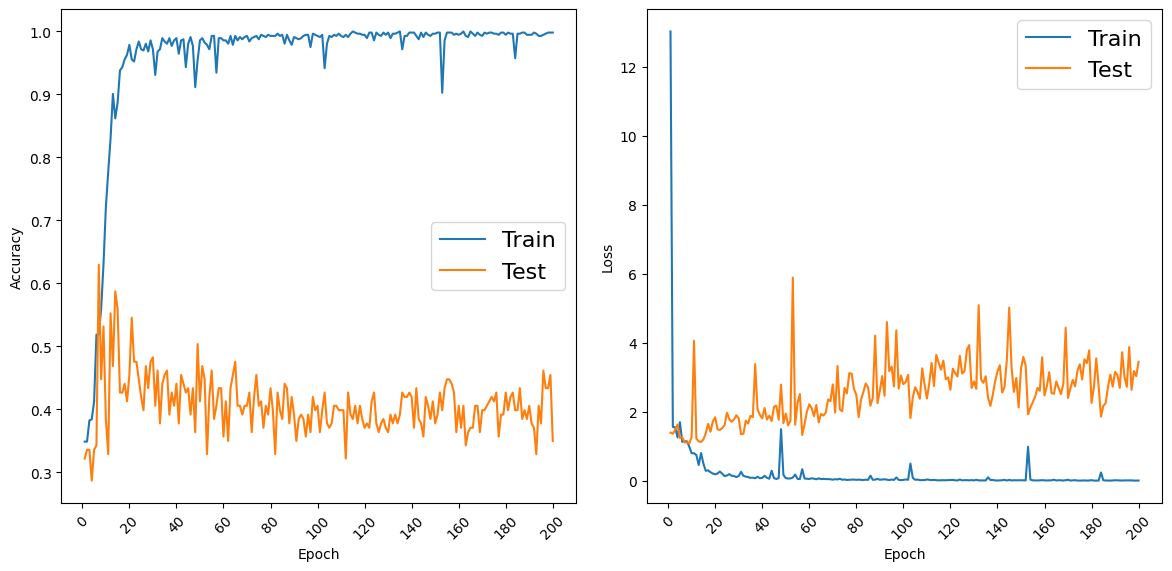

In [ ]:
# CNN model
print('Basic CNN Model')
plot_performance(history)

In [ ]:
cnn_model.save('/content/drive/My Drive/CNN_model/CNN_model.h5')

# ***CNN Model with Image Augmentation***

In [ ]:
# Data augmentation parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

Labels: [array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1])]


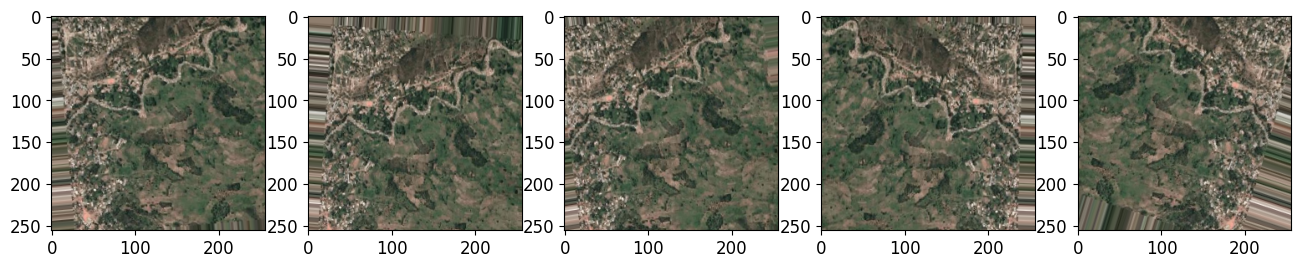

In [ ]:
img_id = 461
plt.rcParams.update({'font.size': 12})
img_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
img_example = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in img_example])
l = [ax[i].imshow(img_example[i][0][0]) for i in range(0,5)]

In [ ]:
# train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
# test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)
input_shape = (256, 256, 3)

# Data generators
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import RMSprop

# Model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/CNN_model_with_ImageAugmentation/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

model_cnn_aug = model
# Train the model with the checkpoint callback
history = model_cnn_aug.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[save_model_callback],
                    verbose=1)

Epoch 1/200
19/19 [==============================] - 15s 554ms/step - loss: 1.2366 - accuracy: 0.3204 - val_loss: 1.0838 - val_accuracy: 0.3217
Epoch 2/200
19/19 [==============================] - 8s 442ms/step - loss: 1.0892 - accuracy: 0.3699 - val_loss: 1.0778 - val_accuracy: 0.4406
Epoch 3/200
19/19 [==============================] - 9s 457ms/step - loss: 1.0789 - accuracy: 0.3611 - val_loss: 1.0403 - val_accuracy: 0.3217
Epoch 4/200
19/19 [==============================] - 10s 510ms/step - loss: 1.0563 - accuracy: 0.4000 - val_loss: 1.0086 - val_accuracy: 0.4056
Epoch 5/200
19/19 [==============================] - 9s 486ms/step - loss: 1.0233 - accuracy: 0.4496 - val_loss: 0.9785 - val_accuracy: 0.5734
Epoch 6/200
19/19 [==============================] - 8s 419ms/step - loss: 0.9932 - accuracy: 0.4832 - val_loss: 1.1640 - val_accuracy: 0.2937
Epoch 7/200
19/19 [==============================] - 9s 500ms/step - loss: 0.9813 - accuracy: 0.4956 - val_loss: 1.0532 - val_accuracy: 0.35

KeyboardInterrupt: 

In [ ]:
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))

In [ ]:
batch_size = 30  # Define the batch size
epochs = 200  # Define the total number of epochs for training

# Load the last saved model
latest_epoch = 190  # Adjust this to the last saved epoch number
model_path = '/content/drive/My Drive/CNN_model_with_ImageAugmentation/model_epoch_{epoch}.h5'.format(epoch=latest_epoch)
cnn_model = load_model(model_path)

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/CNN_model_with_ImageAugmentation/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# Continue training from the last saved epoch
history = cnn_model.fit(x=train_imgs_scaled, y=train_labels,
                        validation_data=(test_imgs_scaled, test_labels),
                        batch_size=batch_size,
                        epochs=epochs - latest_epoch,  # Adjust the total number of epochs
                        verbose=1,
                        callbacks=[save_model_callback])  # Use the same callback to save the model


In [ ]:
def plot_performance(history):
  '''
  metrics plot for model performance
  '''
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  plt.rcParams.update({'font.size': 16})
  #t = f.suptitle(title, fontsize=16)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1, len(history.history['accuracy']) + 1))  # Use length of history
  #epoch_list = list(range(1,101))
  plt.rcParams.update({'font.size': 16})
  ax1.plot(epoch_list, history.history['accuracy'], label='Train')
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Test')
  ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 20))  # Use length of epoch_list
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  #ax1.set_title('Accuracy')

  ax1.tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train')
  ax2.plot(epoch_list, history.history['val_loss'], label='Test')
  ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 20))  # Use length of epoch_list
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  #ax2.set_title('Loss')
  ax2.tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

  l2 = ax2.legend(loc="best")
  f.tight_layout()

In [ ]:
# CNN model
print('CNN Model with Image Augmentation')
plot_performance(history)

In [ ]:
cnn_model.save('/content/drive/My Drive/CNN_model_with_ImageAugmentation/CNN_model_augemnt.h5')

In [ ]:
def plot_performance(history, epochs):
    '''
    Plot metrics for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 4))
    plt.rcParams.update({'font.size': 16})

    # Accuracy plot
    ax1.plot(epochs, history.history['accuracy'], label='Train')
    ax1.plot(epochs, history.history['val_accuracy'], label='Test')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    ax1.legend(loc="best")

    # Loss plot
    ax2.plot(epochs, history.history['loss'], label='Train')
    ax2.plot(epochs, history.history['val_loss'], label='Test')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    ax2.legend(loc="best")

    f.tight_layout()


In [ ]:
# Get the epoch list
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot performance
plot_performance(history, epochs)


# ***Use Pre-trained CNN Model (VGG16) to extract features***

In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras

input_shape = (256, 256, 3)
vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = vgg.layers[-1].output #use last layer
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
#bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
bottleneck_feature_example = vgg.predict(train_imgs_scaled[303:304])
print(bottleneck_feature_example.shape)
plt.rcParams.update({'font.size': 0})
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [ ]:
plt.imshow(train_imgs_scaled[303])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
test_features_vgg = get_bottleneck_features(vgg_model, test_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:', test_features_vgg.shape)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1] # use VGG model as feature extraction

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),#'adam',
              metrics=['accuracy'])

model.summary()

In [ ]:
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/VGG_model/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# use VGG model as feature extraction
model_vgg = model

# Train the model with the checkpoint callback
history = model.fit(x=train_features_vgg, y=train_labels,
                        validation_data=(test_features_vgg, test_labels),
                        batch_size=30,
                        epochs=200,
                        callbacks=[save_model_callback],
                        verbose=1)

In [ ]:
def plot_performance(history):
  '''
  metrics plot for model performance
  '''
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  plt.rcParams.update({'font.size': 16})
  #t = f.suptitle(title, fontsize=16)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1, len(history.history['accuracy']) + 1))  # Use length of history
  #epoch_list = list(range(1,101))
  plt.rcParams.update({'font.size': 16})
  ax1.plot(epoch_list, history.history['accuracy'], label='Train')
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Test')
  ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 20))  # Use length of epoch_list
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  #ax1.set_title('Accuracy')

  ax1.tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train')
  ax2.plot(epoch_list, history.history['val_loss'], label='Test')
  ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 20))  # Use length of epoch_list
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  #ax2.set_title('Loss')
  ax2.tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

  l2 = ax2.legend(loc="best")
  f.tight_layout()

In [ ]:
print('Pre-trained CNN model (VGG) as a Feature Extractor')
plot_performance(history)

In [ ]:
model_vgg.save('/content/drive/My Drive/VGG_model/VGG_model.h5')

# ***Pre-trained CNN model as a Feature Extractor with Image Augmentation

# *** ***VGG16***

In [ ]:
# augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=20)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model) # add VGG here
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),#'adam',
              metrics=['accuracy'])
model.summary()

In [ ]:
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# Train the model with the checkpoint callback
history = model.fit_generator(train_generator, steps_per_epoch=10, epochs=200,
                              validation_data=test_generator,
                              callbacks=[save_model_callback],
                              verbose=1)

In [ ]:
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))

In [ ]:
from keras.models import load_model

# Load the last saved model
latest_epoch = 90  # Adjust this to the last saved epoch number
model_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'.format(epoch=latest_epoch)
cnn_model = load_model(model_path)

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# Continue training from the last saved epoch
history = cnn_model.fit_generator(train_generator, steps_per_epoch=10, epochs=200 - latest_epoch,
                                  validation_data=test_generator,
                                  callbacks=[save_model_callback],
                                  verbose=1)


In [ ]:
from keras.models import load_model

# Load the last saved model
latest_epoch = 50  # Adjust this to the last saved epoch number
model_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'.format(epoch=latest_epoch)
cnn_model = load_model(model_path)

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# Continue training from the last saved epoch
history = cnn_model.fit_generator(train_generator, steps_per_epoch=10, epochs=110 - latest_epoch,
                                  validation_data=test_generator,
                                  callbacks=[save_model_callback],
                                  verbose=1)


In [ ]:
from keras.models import load_model

# Load the last saved model
latest_epoch = 50  # Adjust this to the last saved epoch number
model_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'.format(epoch=latest_epoch)
cnn_model = load_model(model_path)

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/VGG_Aug_model/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# Continue training from the last saved epoch
history = cnn_model.fit_generator(train_generator, steps_per_epoch=10, epochs=60 - latest_epoch,
                                  validation_data=test_generator,
                                  callbacks=[save_model_callback],
                                  verbose=1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    Metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    plt.rcParams.update({'font.size': 16})
    #t = f.suptitle(title, fontsize=16)
    f.subplots_adjust(top=0.85, wspace=0.2)

    epochs = len(history.history['accuracy'])
    epoch_list = np.arange(1, epochs + 1)

    ax1.plot(epoch_list, history.history['accuracy'], label='Train')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Test')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')

    ax1.tick_params(axis='x', rotation=30)  # Rotate the x-axis labels for better readability
    ax1.tick_params(axis='x', which='major', pad=5)  # Increase spacing between x-axis labels
    ax1.tick_params(axis='y', pad=5)  # Increase spacing between y-axis labels

    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train')
    ax2.plot(epoch_list, history.history['val_loss'], label='Test')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')

    ax2.tick_params(axis='x', rotation=30)  # Rotate the x-axis labels for better readability
    ax2.tick_params(axis='x', which='major', pad=5)  # Increase spacing between x-axis labels
    ax2.tick_params(axis='y', pad=5)  # Increase spacing between y-axis labels

    l2 = ax2.legend(loc="best")
    f.tight_layout()

    # Specify custom x-axis ticks and labels
    custom_xticks = np.arange(0, epochs + 1, 20)
    custom_xticklabels = [str(x) for x in custom_xticks]
    ax1.set_xticks(custom_xticks)
    ax1.set_xticklabels(custom_xticklabels)
    ax2.set_xticks(custom_xticks)
    ax2.set_xticklabels(custom_xticklabels)

print('Pre-trained CNN model (VGG) as a Feature Extractor with augmentation')
# Call the function to plot performance
plot_performance(history)


In [ ]:
model.save('/content/drive/My Drive/VGG_Aug_model/VGG_model_augemnt.h5')

# ***VGG16, Fine-tuning***
# ***unfrozen block4 and block5 for training***

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers


model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),#'adam',
              metrics=['accuracy'])
model.summary()


In [ ]:
from keras.callbacks import Callback

class SaveModelCallback(Callback):
    def __init__(self, file_path, save_frequency):
        super(SaveModelCallback, self).__init__()
        self.file_path = file_path
        self.save_frequency = save_frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_frequency == 0:
            self.model.save(self.file_path.format(epoch=epoch + 1))

# Define the file path where the model will be saved
model_file_path = '/content/drive/My Drive/VGG_16_FineTuning/model_epoch_{epoch}.h5'

# Define a checkpoint callback to save the model after every specified number of epochs
save_frequency = 10  # Save the model every 10 epochs

# Define the callback to save the model
save_model_callback = SaveModelCallback(model_file_path, save_frequency)

# Train the model with the checkpoint callback
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=200,
                              validation_data=test_generator, validation_steps=len(test_generator),
                              callbacks=[save_model_callback],
                              verbose=1)


In [ ]:
print('Pre-trained CNN model (VGG) with augmentation and fine-tuning')
plot_performance()

In [ ]:
model.save('/content/drive/My Drive/VGG_16_FineTuning/VGG_model_augemnt_finetune.h5')

# ***ResNet***

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
import keras

input_shape = (256, 256, 3)

ResNet = ResNet50(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = ResNet.layers[-1].output #use last layer
output = keras.layers.Flatten()(output)
ResNet_model = Model(ResNet.input, output)

ResNet_model.trainable = False
for layer in ResNet_model.layers:
    layer.trainable = False

import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in ResNet_model.layers]
df_resnet = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
df_resnet.tail(10)

In [ ]:
ResNet_model.trainable = False

set_trainable = False
for layer in ResNet_model.layers:
    if layer.name in ['conv5_block1_1_conv']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in ResNet_model.layers]
df_restnet_fine = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
display(df_restnet_fine.head())
display(df_restnet_fine.tail())

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(ResNet_model) # add ResNet here
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512 ,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.Adam(learning_rate=1e-4),
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit_generator(train_generator, epochs=200,
                              validation_data=test_generator,#, validation_steps=50,
                              verbose=1)

In [ ]:
print('Pre-trained CNN model (ResNet) with augmentation & finetune')
plot_performance()

In [ ]:
model.save('/content/drive/My Drive/ResNet_model/ResNet_model_augemnt_finetune.h5')

# **MODEL EVALUATION**

In [ ]:
#load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


cnn_model = tf.keras.models.load_model('/content/drive/My Drive/CNN_model/CNN_Lesnet_model.h5')
img_aug_cnn = tf.keras.models.load_model('/content/drive/My Drive/CNN_model_with_ImageAugmentation/CNN_model_augemnt.h5')
tl_cnn = tf.keras.models.load_model('/content/drive/My Drive/VGG_model/VGG_model.h5')
tl_img_aug_cnn = tf.keras.models.load_model('/content/drive/My Drive/VGG_Aug_model/VGG_model_augemnt.h5')

cnn_model = load_model('/content/drive/My Drive/CNN_model/CNN_Lesnet_model.h5')
img_aug_cnn = load_model('/content/drive/My Drive/CNN_model_with_ImageAugmentation/CNN_model_augemnt.h5')
tl_cnn = load_model('/content/drive/My Drive/VGG_model/VGG_model.h5')
tl_img_aug_cnn = load_model('/content/drive/My Drive/VGG_Aug_model/VGG_model_augemnt.h5')
#tl_img_aug_finetune_vgg = load_model('/content/drive/My Drive/VGG_16_FineTuning/VGG_model_augment_finetune.h5')
#tl_img_aug_finetune_resnet = load_model('/content/drive/My Drive/ResNet_model/ResNet_model_augemnt_finetune.h5')
#tl_img_aug_finetune_inception = load_model('/content/drive/My Drive/Inception_model/Inception_model_augemnt_finetune_200.h5')


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 256, 256, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
# load other configurations
IMG_DIM = (256,256)
input_shape = (256,256,3)
num2class_label_transformer = lambda l: [array([1,0,0]) if x == 0
                                         else array([0,1,0]) if x == 1
                                         else array([0,0,1]) for x in l]
#class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255  # scale image pixel to 255
test_imgs_scaled /= 255 # scale image pixel to 255

In [ ]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):

    print('Accuracy:', np.round(metrics.accuracy_score(true_labels,
                                               predicted_labels),4))
    print('Precision:', np.round(metrics.precision_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),4))

def display_confusion_matrix(true_labels, predicted_labels):
    classes = [np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])]
    total_classes = len(classes)
    #level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels,
                                  labels=classes)
    #cm_frame = pd.DataFrame(data=cm,
    #                        columns=pd.MultiIndex(levels=[['Predicted:'], classes],
    #                                              labels=level_labels),
    #                        index=pd.MultiIndex(levels=[['Actual:'], classes],
    #                                            labels=level_labels))
    #print(cm_frame)
    print(cm)

In [ ]:
classes = [np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])]
classes[0]

In [ ]:
# basic CNN Model
print('Basic CNN model')

# Predict on training set
pred_train_probs = cnn_model.predict(train_imgs_scaled, verbose=0)
pred_train = np.argmax(pred_train_probs, axis=1)
pred_train = num2class_label_transformer(pred_train)

print('-----training-----')
get_metrics(train_labels, pred_train)

# Predict on testing set
pred_test_probs = cnn_model.predict(test_imgs_scaled, verbose=0)
pred_test = np.argmax(pred_test_probs, axis=1)
pred_test = num2class_label_transformer(pred_test)

print('-----testing-----')
get_metrics(test_labels, pred_test)


In [ ]:
# basic CNN Model
print('CNN model with augmentation')
print('-----training-----')
pred_train = model_cnn_aug.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = model_cnn_aug.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

In [ ]:
# TR (VGG) Model

test_bottleneck_features_train = get_bottleneck_features(vgg_model, train_imgs_scaled)
test_bottleneck_features_test = get_bottleneck_features(vgg_model, test_imgs_scaled)

print('transfer learning VGG feature extraction')
print('-----training-----')
pred_train = tl_cnn.predict_classes(test_bottleneck_features_train)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_cnn.predict_classes(test_bottleneck_features_test)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

In [ ]:
# Tl-aug-cnn
print('VGG model with augmentation')
print('-----training-----')
pred_train = tl_img_aug_cnn .predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_cnn .predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

In [ ]:
# Tl-aug-cnn finetube
print('VGG model with augmentation / finetune')
print('-----training-----')
pred_train = tl_img_aug_finetune_vgg.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_finetune_vgg.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

In [ ]:
# ResNet-aug-cnn finetube
print('ResNet model with augmentation / finetune')
print('-----training-----')
pred_train = tl_img_aug_finetune_resnet.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_finetune_resnet.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

In [ ]:
# ResNet-aug-cnn finetube
print('Inception model with augmentation / finetune')
print('-----training-----')
pred_train = tl_img_aug_finetune_inception.predict_classes(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_img_aug_finetune_inception.predict_classes(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

In [ ]:
model_names = ['CNN','CNN-Aug','VGG-FE','VGG-Aug','VGG-FT','ResNet-FT','Inception-FT']
acc_train =[0.9965,0.6018,0.6667,0.7526,0.8912,0.6211,0.807]
acc_test=[0.4167,0.6111,0.6111,0.6319,0.6944,0.5903,0.7153]
precision_train=[0.9965,0.6028,0.7804,0.7643,0.8927,0.6155,0.815]
precision_test=[0.4529,0.6489,0.4199,0.6314,0.7015,0.5609,0.7117]
recall_train=[0.9965,0.6018,0.6667,0.7526,0.8912,0.6211,0.807]
recall_test=[0.4167,0.6111,0.6111,0.6319,0.6944,0.5903,0.7153]
f1_train=[0.9965,0.5439,0.5584,0.7481,0.8915,0.5913,0.7967]
f1_test=[0.4109,0.5497,0.4958,0.6225,0.6974,0.5562,0.6978]

df_metrics = pd.DataFrame({'names':model_names,'acc_tr':acc_train,'acc_te':acc_test,
                           'precision_tr':precision_train, 'precison_te':precision_test,
                           'recall_tr':recall_train, 'recall_te':recall_test,
                           'f1_tr':f1_train,'f1_te':f1_test})

NameError: name 'pd' is not defined

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 16})
sns.barplot(x="names", y="acc_tr", data=df_metrics)
plt.xlabel('names')
plt.ylabel('accuracy training')
plt.show()

In [ ]:
import numpy as np

N = 7
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)

ind = np.arange(N)
width = 0.35
plt.barh(ind, acc_train, width, label='train')
plt.barh(ind + width, acc_test, width,
    label='test')

#plt.ylabel('Scores')
plt.title('Model Performance')
plt.xlabel('Accuracy')
plt.yticks(ind + width / 2, ('CNN','CNN-Aug','VGG',
                             'VGG-Aug','VGG-Aug-FT','ResNet-Aug-FT','Inception-Aug-FT'))
#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.show()

In [ ]:
import h5py

# Print the h5py version
print(h5py.__version__)


3.9.0


In [ ]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install cython

In [ ]:
pip install h5py==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: Could not build wheels for h5py, which is required to install pyproject.toml-based projects


In [ ]:
!sudo apt-get update


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,357 kB]
Fetched 3,510 kB in 8s (446 kB/s)
Reading package lists... Done

In [ ]:
!sudo apt-get install libhdf5-serial-dev hdf5-tools libhdf5-dev zlib1g-dev zip libjpeg8-dev liblapack-dev libblas-dev gfortran


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
gfortran is already the newest version (4:11.2.0-1ubuntu1).
libjpeg8-dev is already the newest version (8c-2ubuntu10).
libjpeg8-dev set to manually installed.
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
zip is already the newest version (3.0-12build2).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-2ubuntu9.2).
zlib1g-dev set to manually installed.
Suggested packages:
  liblapack-doc
The following NEW packages will be installed:
  hdf5-tools libblas-dev
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 511 kB of archives.
After this operation, 2,340 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 hdf5-tools amd64 1.10.7+repack-4ubuntu2 [347 kB]
Get:2 http:/

In [ ]:
!sudo apt-get install python3-pip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,967 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.4 [1,305 kB]
Fetched 1,677 kB in 1s (2,036 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [ ]:
!sudo pip3 install -U pip testresources setuptools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!sudo ln -s /usr/include/locale.h /usr/include/xlocale.h


In [ ]:
!pip3 install Cython==0.29.36


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.9
    Uninstalling Cython-3.0.9:
      Successfully uninstalled Cython-3.0.9


In [ ]:
!pip3 install pkgconfig
!git clone https://github.com/h5py/h5py.git
!git checkout 3.1.0
!git cherry-pick 3bf862daa4ebeb2eeaf3a0491e05f5415c1818e4
!H5PY_SETUP_REQUIRES=0 pip3 install . --no-deps --no-build-isolation
!sudo pip3 install -U numpy==1.19.4 future mock keras_preprocessing keras_applications gast==0.2.1 protobuf pybind11 packaging
!sudo pip3 install --extra-index-url https://developer.download.nvidia.com/compute/redist/jp/v461 tensorflow

  Using cached pkgconfig-1.5.5-py3-none-any.whl.metadata (4.0 kB)
Using cached pkgconfig-1.5.5-py3-none-any.whl (6.7 kB)
Cloning into 'h5py'...
remote: Enumerating objects: 27465, done.
remote: Counting objects: 100% (3870/3870), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 27465 (delta 3736), reused 3689 (delta 3649), pack-reused 23595
Receiving objects: 100% (27465/27465), 8.79 MiB | 6.99 MiB/s, done.
Resolving deltas: 100% (20511/20511), done.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━